# Taking the Measure of Your Data

How are the rows of the dataset uniquely identified? (What is the unit of analysis?)<br>
How many rows and columns are in the dataset?<br>
What are the key categorical variables and the frequencies of each value?<br>
How are important continuous variables distributed?<br>
How might variables be related to each other – for example, how might the distribution of continuous variables vary according to categories in the data?<br>
What variable values are out of expected ranges, and how are missing values distributed?<br>

In [1]:
import pandas as pd
import numpy as np

nls97 = pd.read_csv("data/nls97.csv")

In [2]:
covidtotals = pd.read_csv("data/covidtotals.csv",parse_dates=['lastdate'])

In [3]:
#2 Set and show the index and the size of the nls97 data.
nls97.set_index("personid", inplace=True)

In [4]:
nls97.index

Int64Index([100061, 100139, 100284, 100292, 100583, 100833, 100931, 101089,
            101122, 101132,
            ...
            998997, 999031, 999053, 999087, 999103, 999291, 999406, 999543,
            999698, 999963],
           dtype='int64', name='personid', length=8984)

In [5]:
nls97.shape

(8984, 88)

In [6]:
nls97.index.nunique()

8984

In [7]:
#3.Show the data types and non-null value counts:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

In [8]:
#4.Show the first row of the nls97 data
nls97.head(2).T

personid,100061,100139
gender,Female,Male
birthmonth,5,9
birthyear,1980,1983
highestgradecompleted,13,12
maritalstatus,Married,Married
...,...,...
colenroct15,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled


In [9]:
#5.Set and show the index and size for the COVID dat

covidtotals.set_index("iso_code", inplace=True)

In [10]:
covidtotals.index

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'VIR', 'URY', 'UZB', 'VAT', 'VEN', 'VNM', 'ESH', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=210)

In [11]:
covidtotals.head()

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
iso_code,,,,,,,,,,,
AFG,2020-06-01,Afghanistan,15205,257,390.589,6.602,38928341.0,54.422,18.6,1803.987,0.50
ALB,2020-06-01,Albania,1137,33,395.093,11.467,2877800.0,104.871,38.0,11803.431,2.89
DZA,2020-06-01,Algeria,9394,653,214.225,14.891,43851043.0,17.348,29.1,13913.839,1.90
AND,2020-06-01,Andorra,764,51,9888.048,660.066,77265.0,163.755,NaN,NaN,NaN
AGO,2020-06-01,Angola,86,4,2.617,0.122,32866268.0,23.890,16.8,5819.495,NaN


In [12]:
covidtotals.shape

(210, 11)

In [13]:
covidtotals.index.nunique()

210

In [14]:
#6.Show the data types and non-null value counts
covidtotals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, AFG to ZWE
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   lastdate         210 non-null    datetime64[ns]
 1   location         210 non-null    object        
 2   total_cases      210 non-null    int64         
 3   total_deaths     210 non-null    int64         
 4   total_cases_pm   209 non-null    float64       
 5   total_deaths_pm  209 non-null    float64       
 6   population       210 non-null    float64       
 7   pop_density      198 non-null    float64       
 8   median_age       186 non-null    float64       
 9   gdp_per_capita   182 non-null    float64       
 10  hosp_beds        164 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 19.7+ KB


In [15]:
#7.Show a sample of a few rows of the COVID case data
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5.51809e+06,6.98e+07
pop_density,15.405,135.132
median_age,19,40.1
gdp_per_capita,4881.41,16277.7


## Selecting and organizing columns

### We will explore several ways to select columns:

In [16]:
#1.Import the pandas library and load the NLS data into pandas
import numpy as np

In [17]:
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)

In [19]:
nls97.select_dtypes(['object']).apply(lambda x: x.astype('category'))

""
personid
100061
100139
100284
100292
100583
...
999291
999406
999543


In [18]:
nls97.loc[:, nls97.dtypes == 'object'] = nls97.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [20]:
#2.Select a column using the pandas [] bracket operator, and the loc and iloc accessors.

analysisdemo = nls97['gender']

In [21]:
type(analysisdemo)

pandas.core.series.Series

In [22]:
type(analysisdemo)

pandas.core.series.Series

In [23]:
# observe
analysisdemo = nls97[['gender']]

In [24]:
type( analysisdemo )

pandas.core.frame.DataFrame

In [25]:
analysisdemo = nls97.loc[:,['gender']]

In [26]:
type(analysisdemo)

pandas.core.frame.DataFrame

In [27]:
analysisdemo = nls97.iloc[:,[0]]

In [28]:
type(analysisdemo)

pandas.core.frame.DataFrame

In [29]:
#3.Select multiple columns from a pandas DataFrame.
analysisdemo = nls97[['gender','maritalstatus','highestgradecompleted']]

In [30]:
analysisdemo.shape

(8984, 3)

In [31]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13.0
100139,Male,Married,12.0
100284,Male,Never-married,7.0
100292,Male,NaN,NaN
100583,Male,Married,13.0


In [32]:
analysisdemo = nls97.loc[:,['gender','maritalstatus','highestgradecompleted']]

In [33]:
analysisdemo.shape

(8984, 3)

In [34]:
analysisdemo.head()

,gender,maritalstatus,highestgradecompleted
personid,,,
100061,Female,Married,13.0
100139,Male,Married,12.0
100284,Male,Never-married,7.0
100292,Male,NaN,NaN
100583,Male,Married,13.0


In [35]:
#4.Select multiple columns based on a list of columns

keyvars = ['gender','maritalstatus','highestgradecompleted','wageincome','gpaoverall','weeksworked17','colenroct17']


In [36]:
analysiskeys = nls97[keyvars]

In [37]:
analysiskeys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   highestgradecompleted  6663 non-null   float64 
 3   wageincome             5091 non-null   float64 
 4   gpaoverall             6004 non-null   float64 
 5   weeksworked17          6670 non-null   float64 
 6   colenroct17            6734 non-null   category
dtypes: category(3), float64(4)
memory usage: 377.7 KB


In [38]:
#5.Select one or more columns by filtering on column name.

analysiswork = nls97.filter(like="weeksworked")



In [39]:
analysiswork.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8490 non-null   float64
 4   weeksworked04  8458 non-null   float64
 5   weeksworked05  8403 non-null   float64
 6   weeksworked06  8340 non-null   float64
 7   weeksworked07  8272 non-null   float64
 8   weeksworked08  8186 non-null   float64
 9   weeksworked09  8146 non-null   float64
 10  weeksworked10  8054 non-null   float64
 11  weeksworked11  7968 non-null   float64
 12  weeksworked12  7747 non-null   float64
 13  weeksworked13  7680 non-null   float64
 14  weeksworked14  7612 non-null   float64
 15  weeksworked15  7389 non-null   float64
 16  weeksworked16  7068 non-null   float64
 17  weeksworked17  6670 non-null   float64
dtypes

In [41]:
#6.Select all columns with the category data type.
analysiscats = nls97.select_dtypes(include=["category"])
analysiscats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   weeklyhrscomputer      6710 non-null   category
 3   weeklyhrstv            6711 non-null   category
 4   highestdegree          8953 non-null   category
 5   govprovidejobs         1833 non-null   category
 6   govpricecontrols       1859 non-null   category
 7   govhealthcare          1874 non-null   category
 8   govelderliving         1872 non-null   category
 9   govindhelp             1815 non-null   category
 10  govunemp               1811 non-null   category
 11  govincomediff          1775 non-null   category
 12  govcollegefinance      1875 non-null   category
 13  govdecenthousing       1847 non-null   category
 14  govprotectenvironment  1860 non-n

In [42]:
#7.Select all columns with numeric data types:
analysisnums = nls97.select_dtypes(include=["number"])

In [43]:
analysisnums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   birthmonth             8984 non-null   int64  
 1   birthyear              8984 non-null   int64  
 2   highestgradecompleted  6663 non-null   float64
 3   childathome            4791 non-null   float64
 4   childnotathome         4791 non-null   float64
 5   wageincome             5091 non-null   float64
 6   nightlyhrssleep        6706 non-null   float64
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 1

In [44]:
#8.Organize columns using lists of column names
demo = ['gender','birthmonth','birthyear']

highschoolrecord = ['satverbal','satmath','gpaoverall','gpaenglish','gpamath','gpascience']
govresp = ['govprovidejobs','govpricecontrols','govhealthcare','govelderliving','govindhelp',
           'govunemp','govincomediff','govcollegefinance',
           'govdecenthousing','govprotectenvironment']


In [45]:
demoadult = ['highestgradecompleted','maritalstatus','childathome','childnotathome','wageincome',
             'weeklyhrscomputer','weeklyhrstv','nightlyhrssleep',
             'highestdegree']


In [46]:
weeksworked = ['weeksworked00','weeksworked01',
               'weeksworked02','weeksworked03','weeksworked04',
               'weeksworked14','weeksworked15','weeksworked16',
               'weeksworked17']


In [47]:
colenr = ['colenrfeb97','colenroct97','colenrfeb98',
          'colenroct98','colenrfeb99','colenroct99',
          'colenrfeb15','colenroct15','colenrfeb16',
          'colenroct16','colenrfeb17','colenroct17']

In [48]:
#9.Create the new, reorganized DataFrame:

nls97 = nls97[demoadult + demo + highschoolrecord + govresp + weeksworked + colenr]
nls97.dtypes

highestgradecompleted     float64
maritalstatus            category
childathome               float64
childnotathome            float64
wageincome                float64
weeklyhrscomputer        category
weeklyhrstv              category
nightlyhrssleep           float64
highestdegree            category
gender                   category
birthmonth                  int64
birthyear                   int64
satverbal                 float64
satmath                   float64
gpaoverall                float64
gpaenglish                float64
gpamath                   float64
gpascience                float64
govprovidejobs           category
govpricecontrols         category
govhealthcare            category
govelderliving           category
govindhelp               category
govunemp                 category
govincomediff            category
govcollegefinance        category
govdecenthousing         category
govprotectenvironment    category
weeksworked00             float64
weeksworked01 

In [49]:
nls97.select_dtypes(exclude=["category"]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   highestgradecompleted  6663 non-null   float64
 1   childathome            4791 non-null   float64
 2   childnotathome         4791 non-null   float64
 3   wageincome             5091 non-null   float64
 4   nightlyhrssleep        6706 non-null   float64
 5   birthmonth             8984 non-null   int64  
 6   birthyear              8984 non-null   int64  
 7   satverbal              1406 non-null   float64
 8   satmath                1407 non-null   float64
 9   gpaoverall             6004 non-null   float64
 10  gpaenglish             5798 non-null   float64
 11  gpamath                5766 non-null   float64
 12  gpascience             5684 non-null   float64
 13  weeksworked00          8603 non-null   float64
 14  weeksworked01          8564 non-null   float64
 1

In [50]:
nls97.filter(regex='income')

,wageincome,govincomediff
personid,,
100061,12500.0,NaN
100139,120000.0,NaN
100284,58000.0,NaN
100292,NaN,NaN
100583,30000.0,NaN
...,...,...
999291,35000.0,NaN
999406,116000.0,NaN
999543,NaN,NaN


## Selecting rows

In [51]:
nls97 = pd.read_csv("data/nls97.csv")

In [52]:
nls97.set_index("personid", inplace=True)

In [53]:
#2.Use slicing to start at the 1001st row and go to the 1004th row
nls97[1000:1004].T

personid,195884,195891,195970,195996
gender,Male,Male,Female,Female
birthmonth,12,9,3,9
birthyear,1981,1980,1982,1980
highestgradecompleted,NaN,12,17,NaN
maritalstatus,NaN,Never-married,Never-married,NaN
...,...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenroct16,NaN,1. Not enrolled,1. Not enrolled,NaN
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled,NaN


In [54]:
#3.Use slicing to start at the 1001st row and go to the 1004th row, skipping every other row.
nls97[1000:1004:2].T

personid,195884,195970
gender,Male,Female
birthmonth,12,3
birthyear,1981,1982
highestgradecompleted,NaN,17
maritalstatus,NaN,Never-married
...,...,...
colenroct15,NaN,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled
colenroct16,NaN,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled


In [55]:
#4.Select the first three rows using head and [] operator slicing
nls97.head(3).T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13,12,7
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [56]:
nls97.tail(3).T

personid,999543,999698,999963
gender,Female,Female,Female
birthmonth,8,5,9
birthyear,1984,1983,1982
highestgradecompleted,12,12,17
maritalstatus,Divorced,Never-married,Married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [57]:
#5.Select a few rows using the loc data accessor

nls97.loc[[195884,195891,195970]].T

personid,195884,195891,195970
gender,Male,Male,Female
birthmonth,12,9,3
birthyear,1981,1980,1982
highestgradecompleted,NaN,12,17
maritalstatus,NaN,Never-married,Never-married
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [58]:
nls97.loc[195884:195970].T

personid,195884,195891,195970
gender,Male,Male,Female
birthmonth,12,9,3
birthyear,1981,1980,1982
highestgradecompleted,NaN,12,17
maritalstatus,NaN,Never-married,Never-married
...,...,...,...
colenroct15,NaN,1. Not enrolled,1. Not enrolled
colenrfeb16,NaN,1. Not enrolled,1. Not enrolled
colenroct16,NaN,1. Not enrolled,1. Not enrolled
colenrfeb17,NaN,1. Not enrolled,1. Not enrolled


In [59]:
#6.Select a row from the beginning of the DataFrame with the iloc data accessor.
nls97.iloc[[0]].T

personid,100061
gender,Female
birthmonth,5
birthyear,1980
highestgradecompleted,13
maritalstatus,Married
...,...
colenroct15,1. Not enrolled
colenrfeb16,1. Not enrolled
colenroct16,1. Not enrolled
colenrfeb17,1. Not enrolled


In [60]:
#7.Select a few rows from the beginning of the DataFrame with the iloc data accessor.
nls97.iloc[[0,1,2]].T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13,12,7
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [63]:
nls97.iloc[0:3].T

personid,100061,100139,100284
gender,Female,Male,Male
birthmonth,5,9,11
birthyear,1980,1983,1984
highestgradecompleted,13,12,7
maritalstatus,Married,Married,Never-married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [64]:
nls97.iloc[[-3,-2,-1]].T

personid,999543,999698,999963
gender,Female,Female,Female
birthmonth,8,5,9
birthyear,1984,1983,1982
highestgradecompleted,12,12,17
maritalstatus,Divorced,Never-married,Married
...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled


In [65]:
#10. Select multiple rows conditionally using boolean indexing.
nls97.nightlyhrssleep.quantile(0.05)

4.0

In [66]:
nls97.nightlyhrssleep.count()

6706

In [69]:
sleepcheckbool = nls97.nightlyhrssleep<=4
sleepcheckbool

personid
100061    False
100139    False
100284    False
100292    False
100583    False
          ...  
999291    False
999406    False
999543    False
999698    False
999963    False
Name: nightlyhrssleep, Length: 8984, dtype: bool

In [70]:
lowsleep = nls97.loc[sleepcheckbool]
lowsleep.shape

(364, 88)

In [71]:
#10.Select rows based on multiple conditions.
lowsleep.childathome.describe()

count    293.000000
mean       1.788396
std        1.400685
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: childathome, dtype: float64

In [72]:
lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3)]

In [73]:
lowsleep3pluschildren.shape

(82, 88)

In [74]:
#11.Select rows and columns based on multiple conditions.

lowsleep3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3), 
                                  ['nightlyhrssleep','childathome']]

## Generating frequencies for categorical variables

In [75]:
nls97 = pd.read_csv("data/nls97.csv")

In [76]:
nls97.set_index("personid", inplace=True)

In [78]:
nls97.loc[:, nls97.dtypes == 'object'] = nls97.select_dtypes(['object']).\
apply(lambda x: x.astype('category'))

In [79]:
#2. Show the names for columns with the category data type and check for the number of missing values.
catcols = nls97.select_dtypes(include=["category"]).columns
nls97[catcols].isnull().sum()

gender                      0
maritalstatus            2312
weeklyhrscomputer        2274
weeklyhrstv              2273
highestdegree              31
govprovidejobs           7151
govpricecontrols         7125
govhealthcare            7110
govelderliving           7112
govindhelp               7169
govunemp                 7173
govincomediff            7209
govcollegefinance        7109
govdecenthousing         7137
govprotectenvironment    7124
colenrfeb97              7734
colenroct97               483
colenrfeb98               483
colenroct98                96
colenrfeb99               119
colenroct99               133
colenrfeb00               164
colenroct00               179
colenrfeb01               198
colenroct01               226
colenrfeb02               252
colenroct02               286
colenrfeb03               326
colenroct03               362
colenrfeb04               406
colenroct04               438
colenrfeb05               476
colenroct05               513
colenrfeb0

In [80]:
#3. Show the frequencies for marital status
nls97.maritalstatus.value_counts()

Married          3066
Never-married    2766
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [81]:
#4.Turn off sorting by frequency:

nls97.maritalstatus.value_counts(sort=False)

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

In [82]:
#5.Show percentages instead of counts
nls97.maritalstatus.value_counts(sort=False, normalize=True)

Divorced         0.099371
Married          0.459532
Never-married    0.414568
Separated        0.023082
Widowed          0.003447
Name: maritalstatus, dtype: float64

In [83]:
#6.Show the percentages for all government responsibility columns
nls97.filter(like="gov").apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.247681,0.541689,0.665422,0.700321,0.428650,0.218112,0.324507,0.734400,0.442339,0.668817
2. Probably,0.336607,0.334051,0.271078,0.247863,0.411019,0.403092,0.284507,0.230400,0.433676,0.286559
3. Probably not,0.252046,0.086606,0.045358,0.037927,0.119008,0.262838,0.228732,0.026667,0.100162,0.029570
4. Definitely not,0.163666,0.037655,0.018143,0.013889,0.041322,0.115958,0.162254,0.008533,0.023822,0.015054


In [84]:
#7.Find the percentages for all government responsibility columns of people who are married.

nls97[nls97.maritalstatus=="Married"].filter(like="gov").apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols,govhealthcare,govelderliving,govindhelp,govunemp,govincomediff,govcollegefinance,govdecenthousing,govprotectenvironment
1. Definitely,0.173315,0.459864,0.564450,0.632293,0.372549,0.147265,0.258890,0.695418,0.356354,0.644505
2. Probably,0.328748,0.380952,0.359566,0.310719,0.445378,0.395512,0.273115,0.261456,0.493094,0.313433
3. Probably not,0.314993,0.112925,0.051560,0.037992,0.142857,0.328191,0.284495,0.033693,0.120166,0.028494
4. Definitely not,0.182944,0.046259,0.024423,0.018996,0.039216,0.129032,0.183499,0.009434,0.030387,0.013569


In [85]:
#8.Find the frequencies and percentages for all category columns in the DataFrame

freqout = open('views/frequencies.txt', 'w')

for col in nls97.select_dtypes(include=["category"]):
    print(col, "----------------------", "frequencies",nls97[col].value_counts(sort=False),"percentages",
          nls97[col].value_counts(normalize=True, sort=False), sep="\n\n", end="\n\n\n", file=freqout)

In [86]:
freqout.close()

Frequency distributions may be the most important statistical tool for discovering potential data issues with categorical data. The one-way frequencies we generate in this recipe are a good foundation for further insights.

### Generating summary statistics for continuous variables

In [87]:
import matplotlib.pyplot as plt

In [88]:
covidtotals = pd.read_csv("data/covidtotals.csv",parse_dates=['lastdate'])

In [89]:
covidtotals.set_index("iso_code", inplace=True)

In [90]:
covidtotals.shape

(210, 11)

In [91]:
covidtotals.sample(2, random_state=1).T

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5.51809e+06,6.98e+07
pop_density,15.405,135.132
median_age,19,40.1
gdp_per_capita,4881.41,16277.7


In [92]:
covidtotals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases                 int64
total_deaths                int64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
dtype: object

In [94]:
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,2.100000e+02,210.000000,209.000000,209.000000,2.100000e+02,198.000000,186.000000,182.000000,164.000000
mean,2.921614e+04,1770.714286,1361.842909,55.925440,3.694276e+07,362.867434,30.627957,19539.154588,3.012671
std,1.363978e+05,8705.565857,2629.894101,145.081876,1.425092e+08,1581.438294,9.133152,19862.354091,2.464917
min,0.000000e+00,0.000000,0.894000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,1.757500e+02,4.000000,96.785000,0.893000,1.031042e+06,37.416000,22.250000,4485.329000,1.300000
50%,1.242500e+03,25.500000,281.997000,6.214000,6.909866e+06,87.250000,30.250000,13183.081500,2.358500
75%,1.011700e+04,241.250000,1803.318000,32.158000,2.615868e+07,214.122000,39.000000,28556.527250,3.895750
max,1.790191e+06,104383.000000,19771.348000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000


In [95]:
# Take a closer look at the distribution of values for the cases and deaths columns

totvars = ['location','total_cases','total_deaths','total_cases_pm','total_deaths_pm']

In [96]:
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,0.0,0.0,0.8940,0.0000
0.1,22.9,0.0,18.4870,0.0000
0.2,105.2,2.0,56.7386,0.4008
0.3,302.0,6.7,118.2282,1.7348
0.4,762.0,12.0,214.9182,3.9734
0.5,1242.5,25.5,281.9970,6.2140
0.6,2514.6,54.6,546.0534,12.5644
0.7,6959.8,137.2,1074.0324,26.0638
0.8,16847.2,323.2,2208.7374,50.2896
0.9,46513.1,1616.9,3771.9956,139.5290


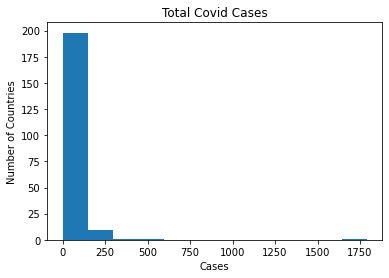

In [99]:
#View the distribution of total cases:
plt.hist(covidtotals['total_cases']/1000, bins=12)
plt.title("Total Covid Cases")
plt.xlabel('Cases')
plt.ylabel("Number of Countries")
plt.show()